# Regressão

Material derivado do curso de Machine Learning da IBM: <br>
https://www.coursera.org/learn/machine-learning-with-python

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [7]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"


--2022-04-30 15:06:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Carregou certificado CA "/etc/ssl/certs/ca-certificates.crt"
Resolvendo cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Conectando-se a cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 72629 (71K) [text/csv]
Salvando em: “FuelConsumptionCo2.csv.1”

FuelConsumptionCo2. 100%[===================>]  70,93K   196KB/s    em 0,4s    

2022-04-30 15:06:46 (196 KB/s) - “FuelConsumptionCo2.csv.1” salvo [72629/72629]



## FuelConsumption.csv

O dataset que você baixou contém dados de consumo de combustível de diferentes modelos de veículos a partir das quais é possíveis estimar a taxa de emissão de CO2. A seguir uma breve descrição de cada atributo.

    MODELYEAR e.g. 2014
    MAKE e.g. Acura
    MODEL e.g. ILX
    VEHICLE CLASS e.g. SUV
    ENGINE SIZE e.g. 4.7
    CYLINDERS e.g 6
    TRANSMISSION e.g. A6
    FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0 #variável objetivo


A seguir utilizamos as seguintes funções:
- `df.head()`: apresenta as primeiras 5 amostras da base e todos os seus atributos.
- `df.describe()`: Apresenta estastísticas gerais de cada atributo.

In [14]:
df = pd.read_csv("FuelConsumptionCo2.csv")
display(df.head())
df.describe()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Q1. Regressão Simples

A variável que gostaríamos de prever é a `CO2EMISSIONS`. Faremos nessa primeira atividade uma regressão simples, onde a partir de uma única variável, vamos modelar a predição da variável objetivo.

- Plot o espalhamento de cada uma das variáveis em relação à emissão de CO2 (função scatter do matplotlib, `plt.scatter`)
- Plot também a matriz de correlação (`df.corr`)
- Selecione a variável mais correlacionada para alimentar nosso modelo no passo seguinte.
> Note que as bibliotecas necessárias já foram importadas no início deste documento.

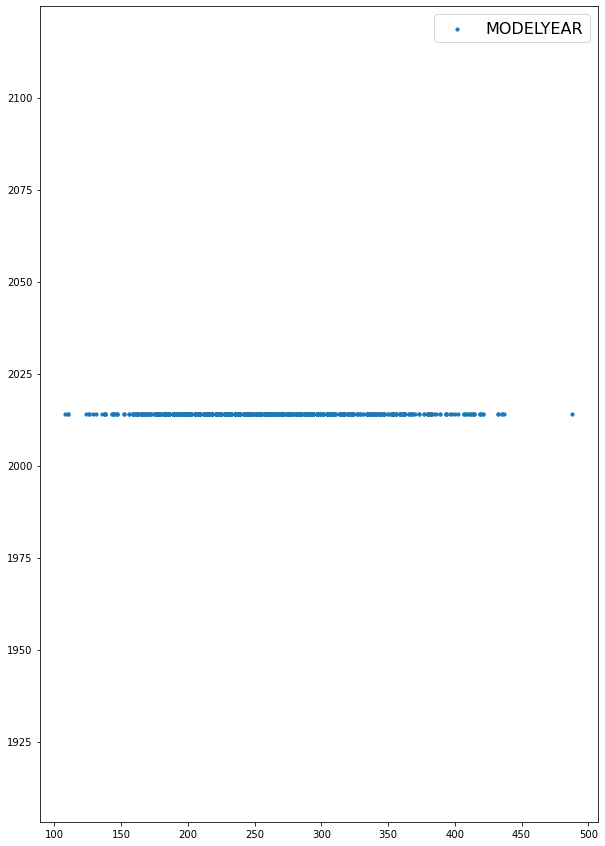

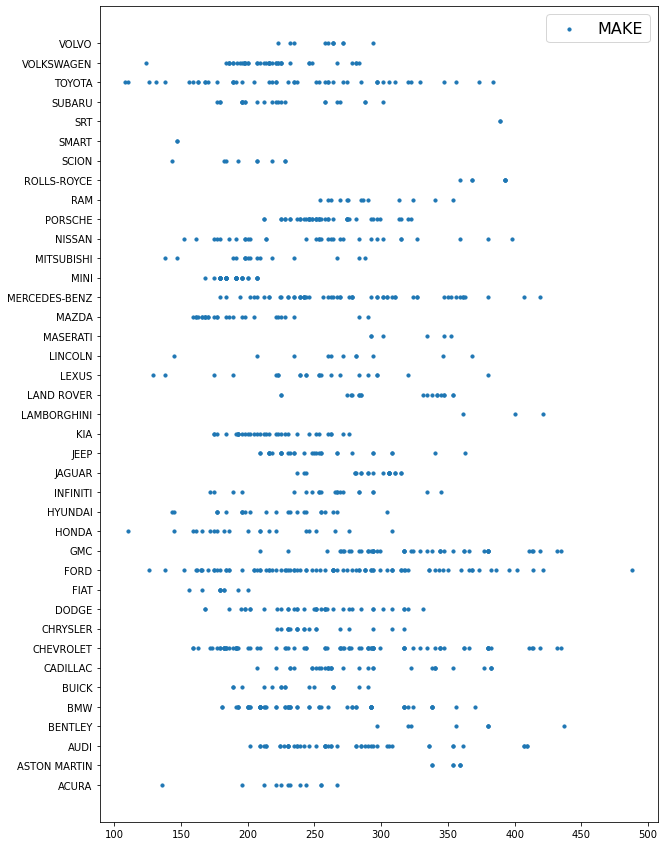

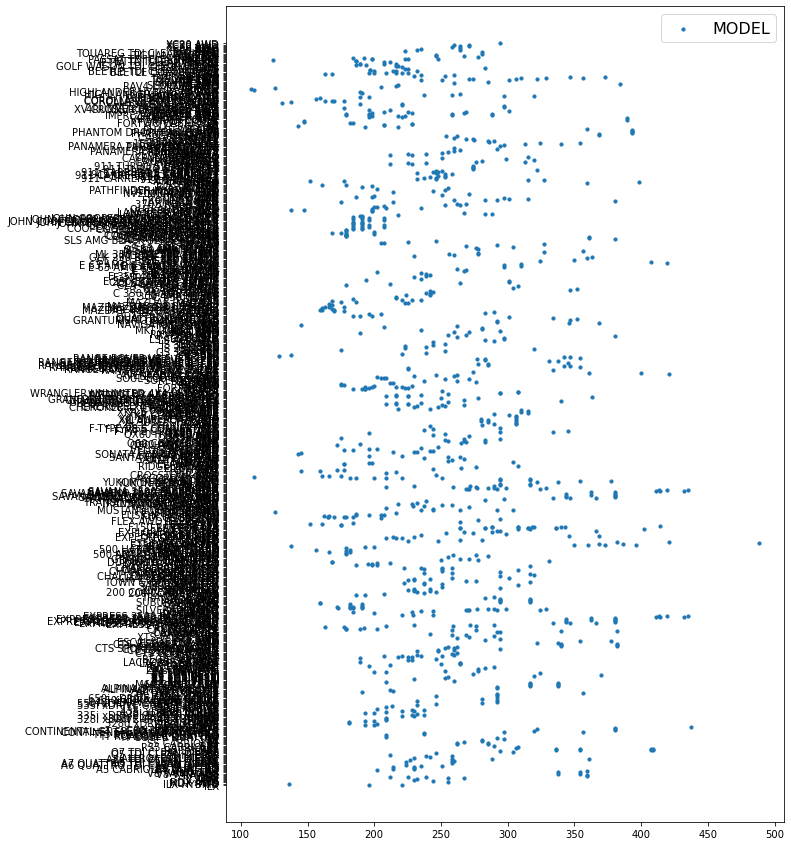

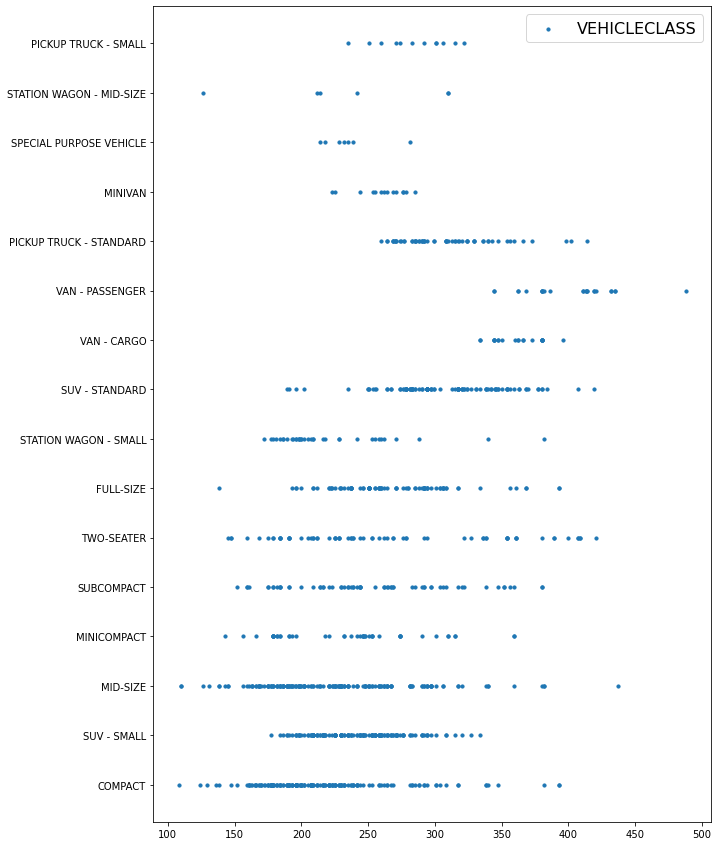

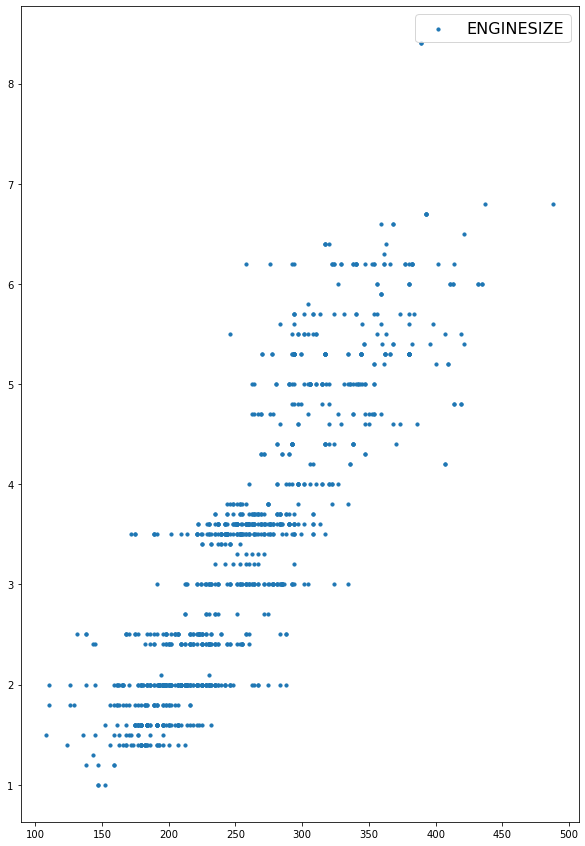

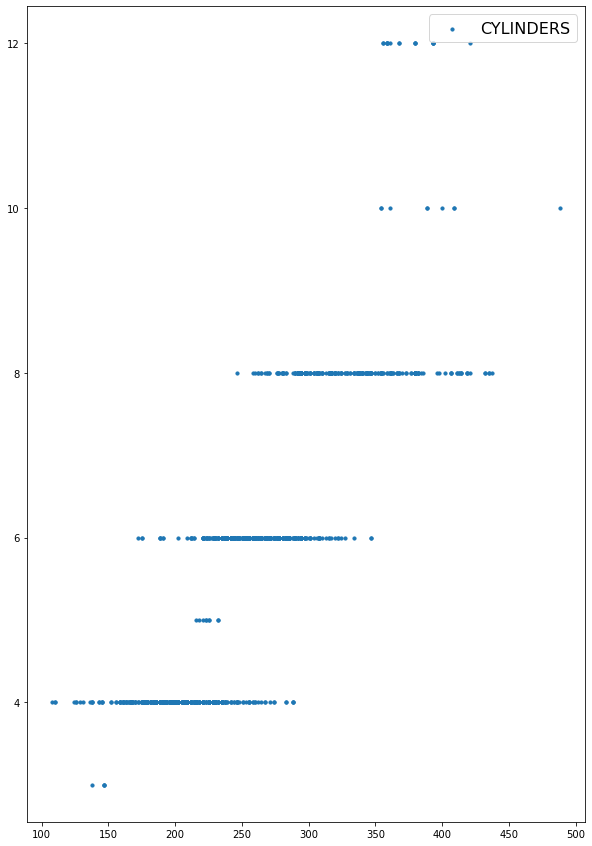

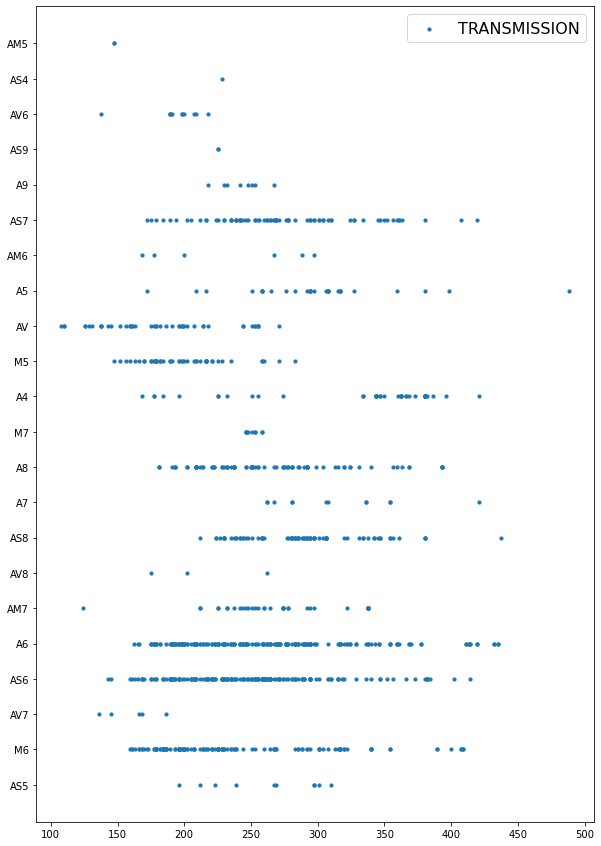

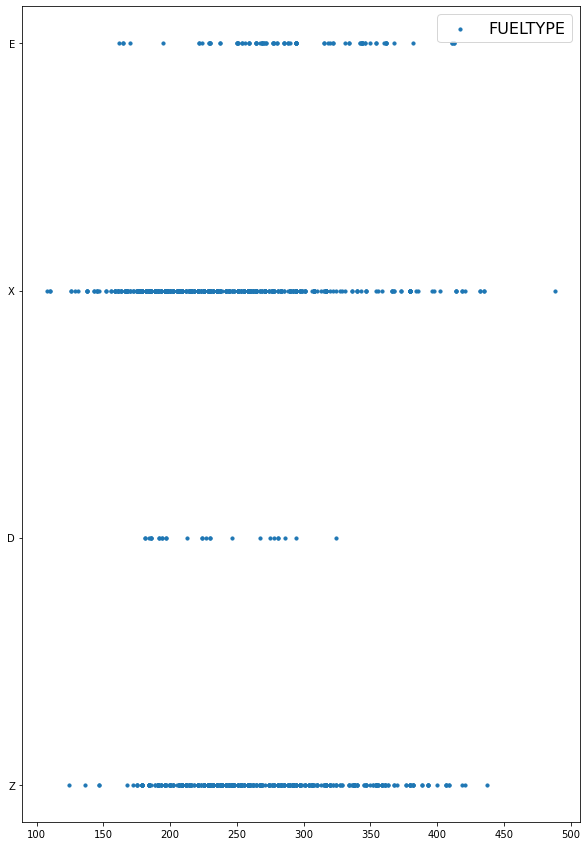

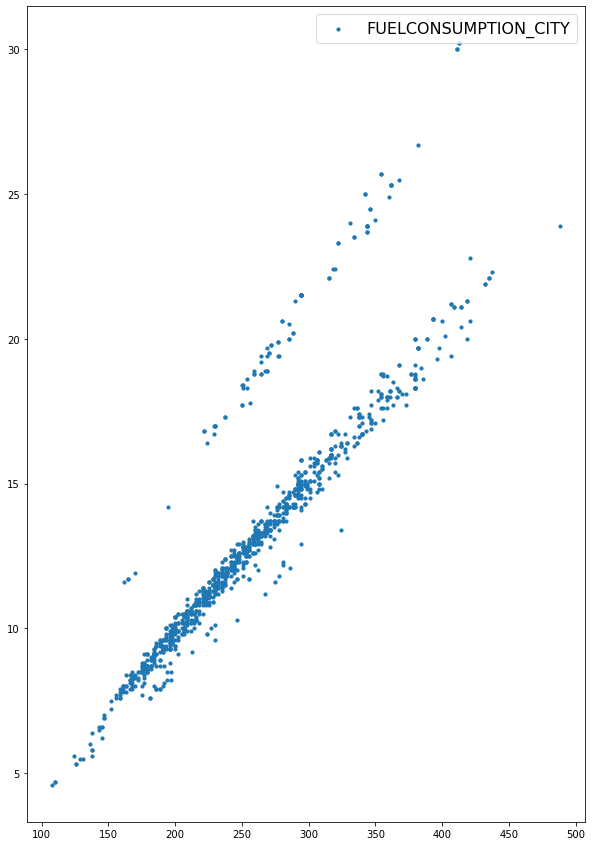

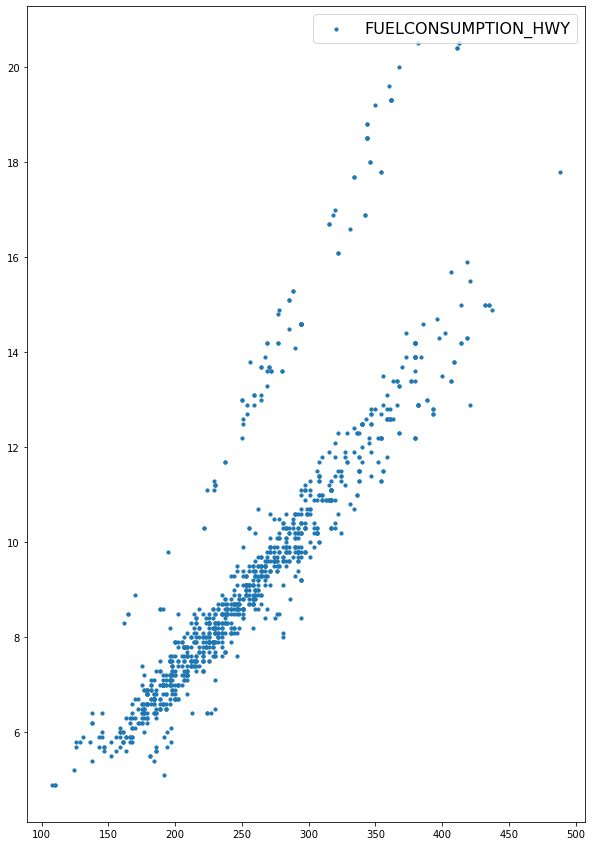

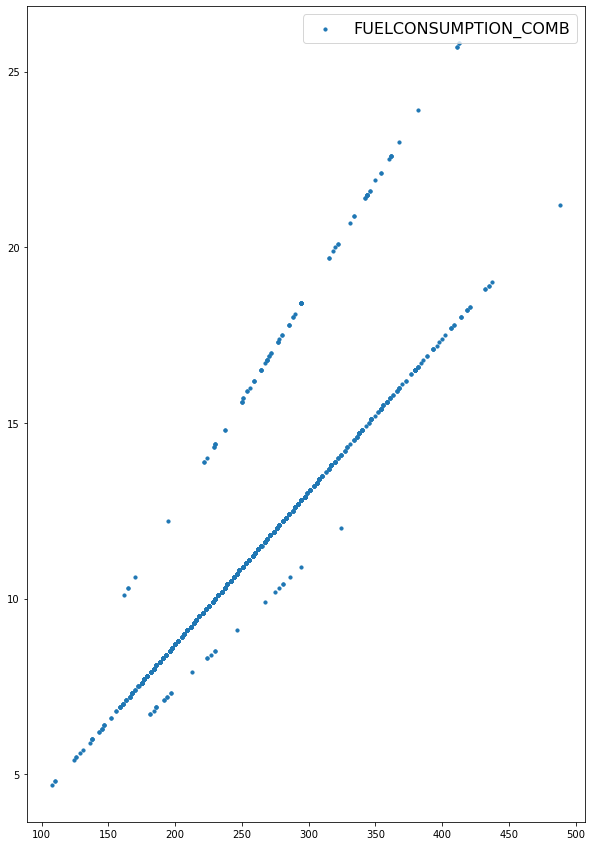

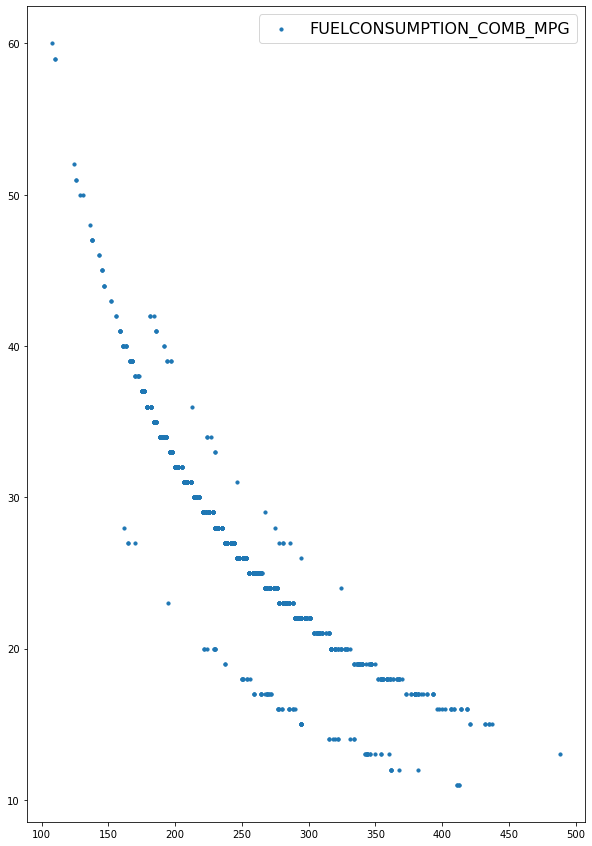

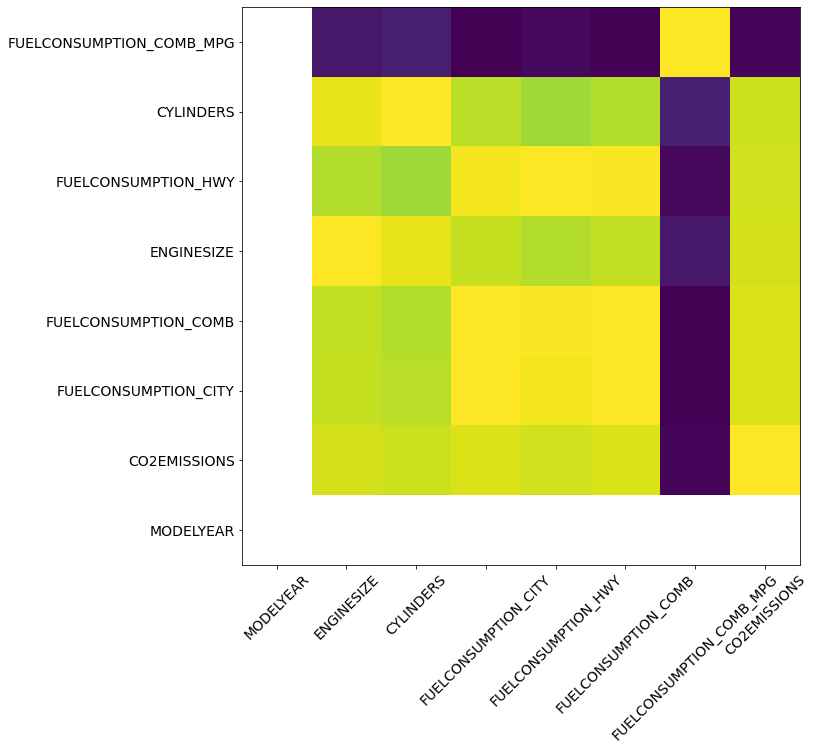

In [10]:
for col in df.columns:
    plt.figure(figsize=(10,15))
    if col != "CO2EMISSIONS":
        plt.scatter(df['CO2EMISSIONS'],df[col], s=10, label=col)
        plt.legend(fontsize=16)
        plt.show()

corr = df.corr().sort_values(by="CO2EMISSIONS")
plt.imshow(corr)
plt.xticks(np.arange(len(corr.columns)), corr.columns, fontsize=14, rotation=45 )
plt.yticks(np.arange(len(corr.index)), corr.index, fontsize=14 )
plt.show()

# Das variáveis da tabela, a que possui maior correlação é a FUELCOMSUMPTION_COMB_MPG


**Realize a regressão linear simples com a variável selecionada no passo anterior. Use o pacote sklearn.**
- Separe os dados em treino e teste
- Ajuste o modelo no treino
- Imprima as métricas R2 score e a média dos resíduos ao quadrado (MSE) em ambos o treino e o teste.

In [76]:
length = len(df.columns)

train_x = np.array(df['FUELCONSUMPTION_COMB_MPG'])
train_y = np.array(df['CO2EMISSIONS'])

train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)

reg_model = LinearRegression().fit(train_x,train_y)

predicted_x = reg_model.predict(train_x)

print(reg_model.score(train_x,train_y))
print(reg_model.intercept_)

0.8215504993118918
[459.5843787]


**Plot o modelo resultante de seu treinamento**

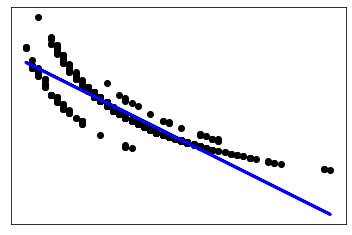

In [77]:
plt.scatter(train_x, train_y,  color='black')
plt.plot(train_x, predicted_x, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## Q2. Regressão polinomial

Para dados que não são linearmente separados, modelos polinomiais podem oferecer complexidade mais adequada. 

A função PolynomialFeatures() na biblioteca Scikit-learn pode nos ajudar nessa tarefa, já que ela gera uma matriz composta pelas combinações polinomiais das características do atributo. Por exemplo, digamos que o conjunto original tenha apenas um recurso, `ENGINESIZE`. Agora, se selecionarmos o grau do polinômio como 2, ele gerará 3 recursos, grau=0, grau=1 e grau=2.

**Realize a regressão polinomial a partir de `ENGINESIZE`**
- Extraia combinações polinomiais do atributo (experimente pelo menos dois diferentes graus de polinômio) 
- Alimente as características polimomias ao modelo de Regressão Linear

> Lembre-se de treinar em um conjunto e testar em outro. Meça a qualidade dos modelos produzidos em cada experimento. **Qual deles produziu a melhor resultado de teste?**

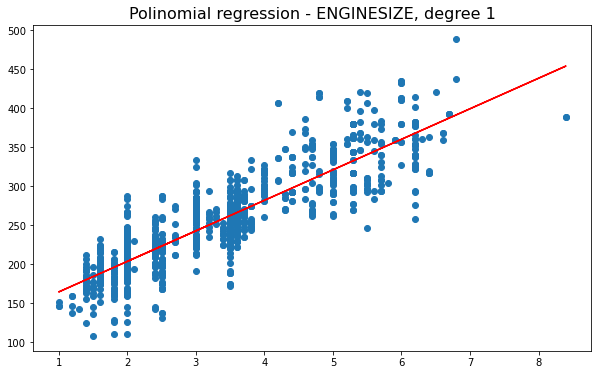

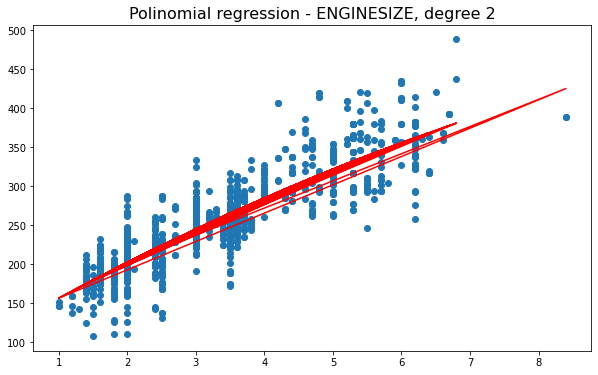

In [83]:
from sklearn.preprocessing import PolynomialFeatures

# Grau 1
train_x = np.array(df['ENGINESIZE'])
train_y = np.array(df['CO2EMISSIONS'])

poly = PolynomialFeatures(degree=1,include_bias=False)
poly_features = poly.fit_transform(train_x.reshape(-1,1))

poly_reg_model = LinearRegression().fit(poly_features,train_y)

y_predicted = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10,6))
plt.title("Polinomial regression - ENGINESIZE, degree 1", size=16)
plt.scatter(train_x,train_y)
plt.plot(train_x,y_predicted,color="red")
plt.show()

# Grau 2
train_x = np.array(df['ENGINESIZE'])
train_y = np.array(df['CO2EMISSIONS'])

poly = PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(train_x.reshape(-1,1))

poly_reg_model = LinearRegression().fit(poly_features,train_y)

y_predicted = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10,6))
plt.title("Polinomial regression - ENGINESIZE, degree 2", size=16)
plt.scatter(train_x,train_y)
plt.plot(train_x,y_predicted,color="red")
plt.show()

## Q3. Regressão multivariada

Na realidade, existem múltiplas variáveis que impactam a emissão de co2. Quando mais de uma variável independente está presente, o processo é chamado de regressão linear múltipla. Um exemplo de regressão linear múltipla é prever a emissão de co2 usando os recursos `FUELCONSUMPTION_COMB`, `ENGINESIZE` e `CYLINDERS`. O bom aqui é que o modelo de regressão linear múltipla é a extensão do modelo de regressão linear simples.

**Realize a regressão multivariada com as seguintes variáveis**
- As três mencionadas no enunciado
- Substitua `FUELCONSUMPTION_COMB` por `FUELCONSUMPTION_CITY` e `FUELCONSUMPTION_HWY` 

> Lembre-se de treinar em um conjunto e testar em outro. Lembre-se que para cada experimento deve-se medir a qualidade dos modelos. Aproveite e reflita sobre o que pode ter afetado as diferenças na acurácia.

In [84]:
from sklearn.model_selection import train_test_split

train_x, test_x = train_test_split(df[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']],test_size=0.95)
train_y, test_y = train_test_split(df['CO2EMISSIONS'],test_size=0.95)

reg_model = LinearRegression().fit(train_x,train_y)

prediction = reg_model.predict(test_x)

print(reg_model.score(train_x,train_y))
print(reg_model.intercept_)

train_x, test_x = train_test_split(df[['FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']],test_size=0.95)
train_y, test_y = train_test_split(df['CO2EMISSIONS'],test_size=0.95)

reg_model = LinearRegression().fit(train_x,train_y)

prediction = reg_model.predict(test_x)

print(reg_model.score(train_x,train_y))
print(reg_model.intercept_)

0.020595370120266687
250.9309163496663
0.14561207141025068
202.1606785983112
